In [6]:
import numpy as np
from fourier import compute_fourier_coeff
from signal_functions import truncated_sine_series

import matplotlib.pyplot as plt

__True solution__: $$ w^\ast (t) = \sum_{j=1}^{M+1}  \frac{2 \sin(2 \pi j t )}{j^\beta} \quad \quad
 |\widehat{w}^\ast_l| \sim \frac{1}{l^{\beta}} $$ 


__Kernel__:

$$ k (t) = 1+ \sum_{j=-M}^{M+1}  \frac{\exp\{2 \pi i j t \}}{j^\gamma} \   \quad \quad
 \widehat{k}_l \sim \frac{1}{l^{\gamma}}$$



__Eigenvalues of covariance operator__: $$ \gamma_l =  \hat{k}_l\, \mathbb{E}[|\hat{X}_l|^2]) $$


__Source conditions__:

$$ 
\sum_{l \in \mathbb{Z}} \frac{{|\hat{w}^\ast_l|^2 } }{\hat{k}_l\, \gamma_l^{2\alpha}}  < + \infty
$$

Careful!!:

-- lambda has to be very small (and not only depend on N) to get a good approx

-- why are the Fourier coefficients of the kernel also negative? the imaginary part seems small enough

In [7]:
#CHOOSE number of input functions
num_samples = 30

grid_points = 2**11 # grid points


t_left = -.5
t_right = .5

time_interval = t_right - t_left

time_array = np.linspace(t_left,t_right,grid_points)


In [8]:
beta = 1.1 
gamma =  1.01
if gamma <=1:
    raise ValueError("gamma must be > 1")
eta = .002
alpha_sup = (2*beta -1 - gamma) / 2*(gamma + eta)
print("alpha_sup" , alpha_sup)
alpha = .9 * alpha_sup

if alpha <= 0 or alpha > 1:
    raise ValueError("alpha must be > 0 and < 1")

lamb = 1e-4* num_samples ** (-  1  / (2* alpha + 2)) # regularization parameter

alpha_sup 0.09614000000000009


In [9]:
#CHOOSE ground truth function and obs. noise         y_i = x_i * target + noise
target_sum_terms = 500  # index M of truncation of the fourier series
target = truncated_sine_series(
    input_points=time_array, decay_rate=beta, num_terms=target_sum_terms
)                       

noise = 0.02

##fourier coefficients of w_true
true_w_coeff = compute_fourier_coeff(target, time_interval)  # normalized by the number of grid points




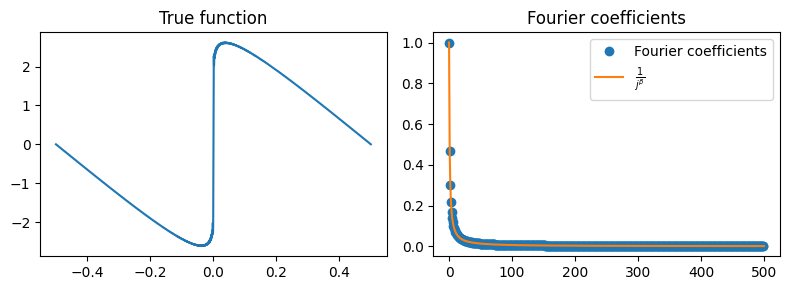

In [10]:

#plot the true function and its fourier coefficients in two subplots
fig,(ax1, ax2)  = plt.subplots(1,2,figsize=(8, 3))
ax1.plot(time_array,target)
ax1.set_title('True function')

ax2.plot(np.abs(true_w_coeff)[1:target_sum_terms+1], 'o', label='Fourier coefficients')
aux_vec=np.arange(1,true_w_coeff.size+1, dtype=float)
ax2.plot(aux_vec[:target_sum_terms+1]**(-beta), label=r'$\frac{1}{j^\beta}$')
ax2.set_title('Fourier coefficients')
ax2.legend()
plt.tight_layout()



1. __Frequency localized signals__: 
    $$X(t) = e^{2 \pi i L t} =  \cos(2 \pi L t) + i \sin(2 \pi L t) $$
    where $L$ is a $ \rho $-distributed random variable on $\mathbb{Z}$.
    
    Eigenvalues of covariance operator: $\gamma_l = \hat{k}_l \rho_l$ we choose $ \rho_l = \frac{1}{l^\eta} $


    Source conditions: 
    $$\sum_l \frac{l^{-2\beta}}{l^{-2\alpha(\gamma + \eta)} l^{-\gamma}} < \infty 
    \quad \rightarrow \quad \alpha < \frac{2 \beta -1 -\gamma}{2 (\gamma + \eta)}. $$




2. __Time localized signals__:  
    $$ X(t) = \frac{1}{2\delta}{1}_{[0,2 \delta]} (t-T) $$
    with $T$ random variable on $G$ and $\delta>0$.
    We choose $T \sim \mathcal{N}(\mu,\sigma^2)$.

    Eigenvalues of the covariance operator: $\gamma_j= \hat{k}_j  \text{sinc}^2({ 2 \pi \delta l } ) .$
    

In [ ]:
#To draw samples from the distribution rho_l = l^-beta

def power_law_samples(N, L, eta):
    """
    Generates N samples drawn from a power law probability distribution on the integers
    with exponent eta.
    
    Args:
    - N: an integer specifying the number of samples to generate
    -L: the samples are drawn in the interval [1,L+1]
    - eta: a positive float specifying the exponent of the power law
    
    Returns:
    - A numpy array of N integers drawn from the power law distribution
    """
    # Define the power law probability density function
    def p(x):
        return 1.0 / (x**eta)
    
    # Define the normalization constant
    Z = sum([p(l) for l in range(1, L+1)])
    
    # Generate the samples
    samples = []
    while len(samples) < N:
        # Choose a random integer in the range [1, L+1] with probability proportional to p(l)
        n = np.random.choice(range(1, L+1), p=[p(l)/Z for l in range(1, L+1)])
        samples.append(n)
    
    return np.array(samples)

In [ ]:
# ### Case 1. Inputs localized in frequency

# ##random vector for frequencies
L_max = target_sum_terms
L = power_law_samples(num_samples, L_max, eta)  #you are taking only positive frequencies

# # ##Inputs X = [x_1, .., x_N]
X =  np.array([ np.exp(1j*2*l*np.pi*time_array) for l in L]).T


# # ##fourier coefficients of X, Y and true sol  
# # X_fourier =  fourier_coeff(X,T)                                #np.fft.fft(X, axis=0)  / d 
# # ##take the conjugate of the fourier coefficients of X
# # X_fourier_conj = np.conj(X_fourier)
# ###############################################################

# ## Or: comment above and directly take the Fourier coefficients of the inputs

# X_fourier = np.zeros((d,N), dtype=complex)
# for i in range(N):
#     X_fourier[L[i],i] = 1.

# X_fourier_conj = np.conj(X_fourier)


In [ ]:
## Case 2. Inputs localized in time

##Gaussian vector 
# R = np.random.normal(0,.25,N)

#Inputs X = [x_1, .., x_N]
# delta = 0.003
# X = np.array([np.where(((t-l) <= 2*delta) & ((t-l)>=0), 1, 0) for l in R]).T / (2*delta)

# X_fourier = np.zeros((d,N), dtype=complex)
# for l in range(d):
#     X_fourier[l,:] = (np.sinc(2*delta*l) )**2

X_fourier = fourier_coeff(X,time_interval)                                #np.fft.fft(X, axis=0)  / d

X_fourier_conj = np.conj(X_fourier)



In [ ]:
# plt.plot(t,X);

In [ ]:
#Output data matrix 
Y = np.zeros((grid_points,num_samples))   #noisy 
for i in range(0,num_samples):
    Y[:,i] = np.fft.ifft(grid_points*(true_w_coeff)*(X_fourier[:,i])) + noise * np.random.normal(0,1,grid_points)
   

Y_fourier = fourier_coeff(Y,time_interval)    #np.fft.fft(Y, axis=0) / d

########################################################################
# or comment above and work directly in Fourier space

# Y_fourier = np.zeros((d,N))   #noisy 
# for i in range(0,N):
#     Y_fourier[:,i] = true_w_coeff*(X_fourier[:,i]) #+ noise?!? in fourier space??
    #parte reale??
                                  

/tmp/ipykernel_4293/2720769123.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  Y[:,i] = np.fft.ifft(d*(true_w_coeff)*(X_fourier[:,i])) + noise * np.random.normal(0,1,d)


In [ ]:
#kernel 

# def Sobolev_fun(t):
    # return 1 + (t**2)*np.pi**2 - np.pi**2*t + (np.pi**2)/6

#kernel function periodic on the torus

# def Sobolev_fun_periodic(t):
#     return np.where(t<=0, Sobolev_fun(t+1), Sobolev_fun(t))

# def periodic(t,sigma=1,ell=1):
#     return sigma**2 * np.exp( -2*(np.sin(np.pi*np.abs(t)))**2 / ell**2 )

# def Dirichlet(t,p):
#     return (2*p + 1)* ( np.sinc( (2*p + 1) * (t)  ) / np.sinc(t) )

def kernel_fun(t,gamma,M):
    return 1 + sum((np.exp(1j*2*k*np.pi*t) / (k**gamma)) for k in range(1,M+1)) + sum((np.exp(1j*2*k*np.pi*t) / (np.abs(k)**gamma)) for k in range(-M,0))


def kernel_cosines(t,gamma,M):
    return 1 + sum((2* np.cos(2*k*np.pi*t) / (k**gamma)) for k in range(1,M+1)) 

M = 100

kerfun_eval = kernel_cosines(time_array,gamma, M)

kernel_coeff = fourier_coeff(kerfun_eval, time_interval)



/tmp/ipykernel_4293/660622357.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


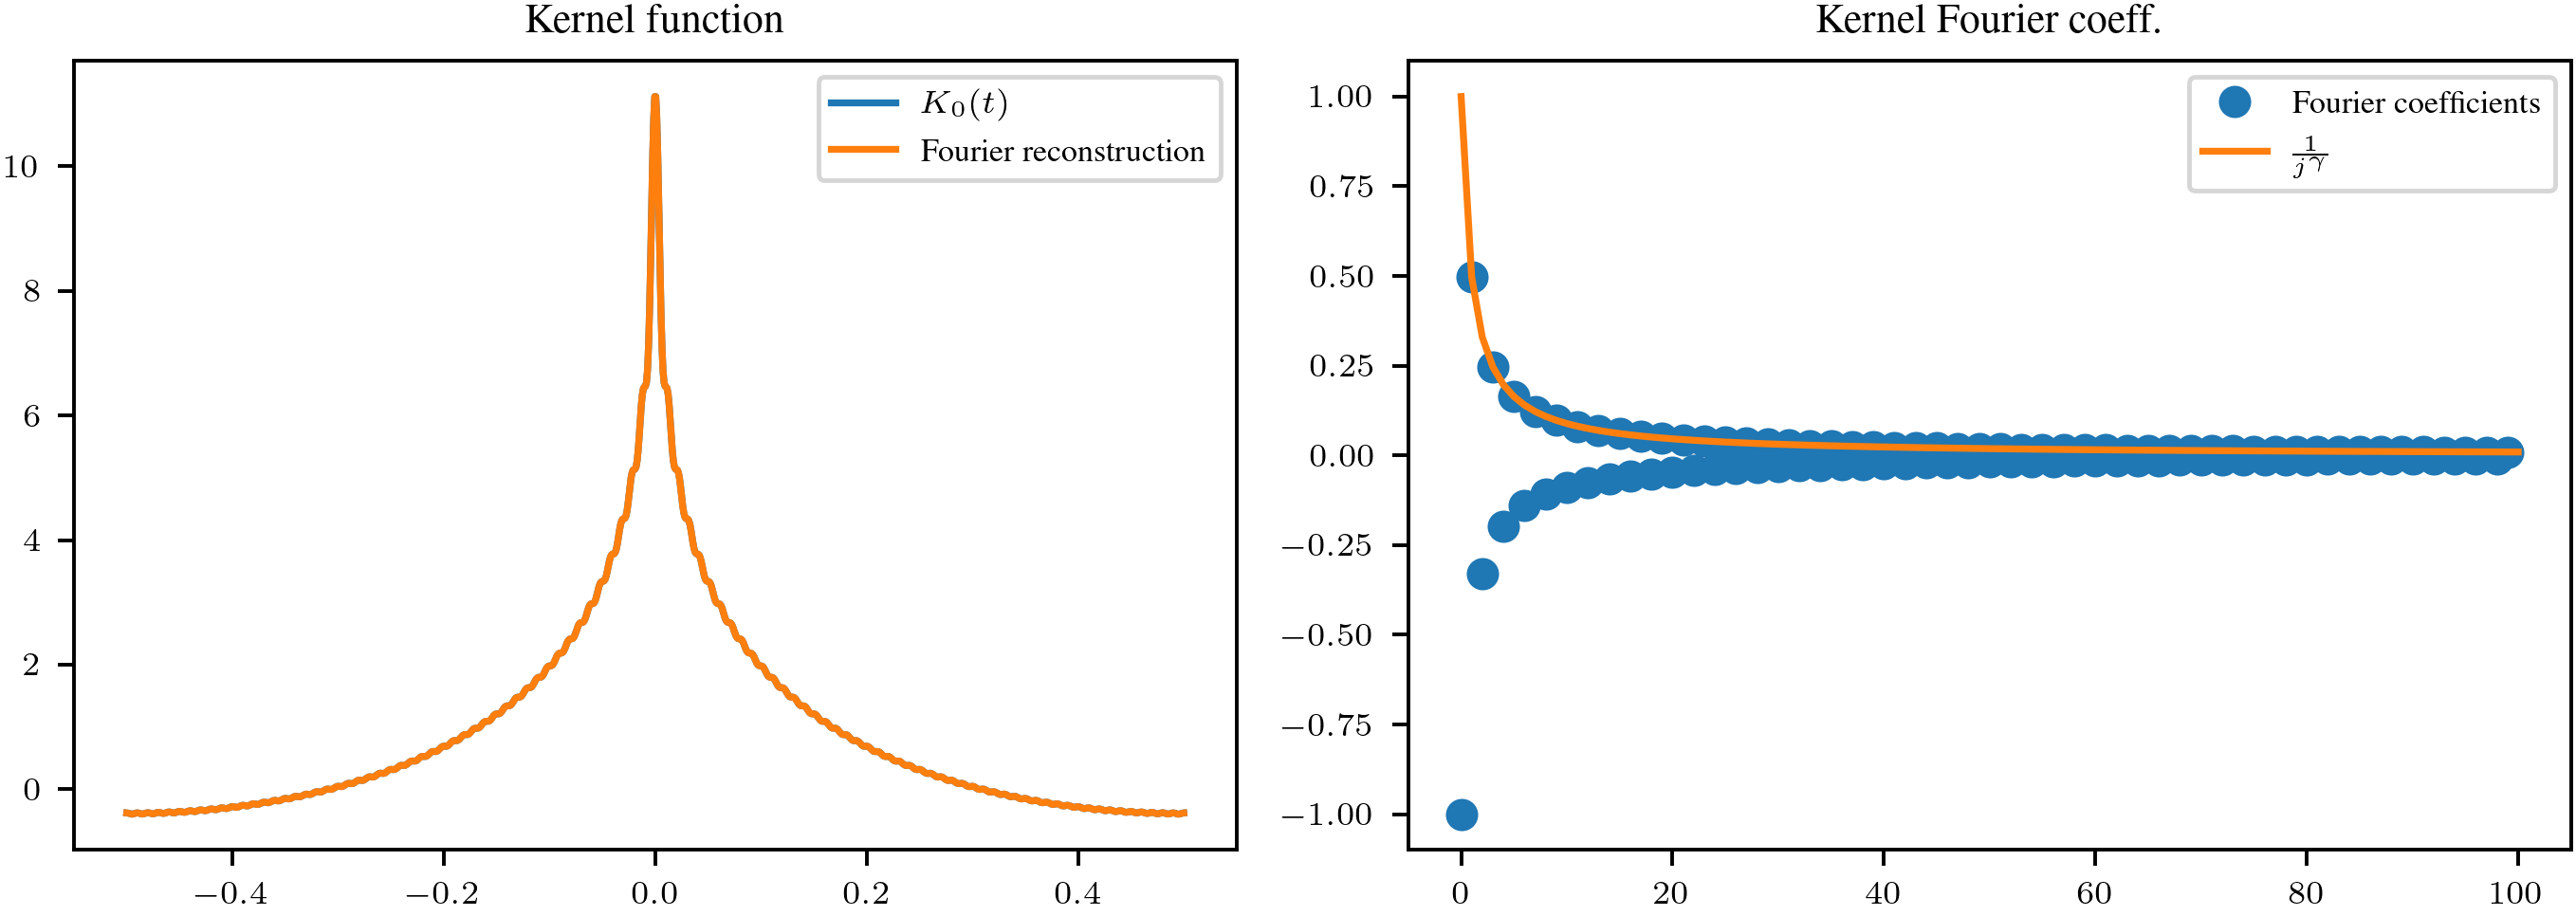

In [ ]:
fig,(ax1, ax2)  = plt.subplots(1,2,figsize=(8, 3))
ax1.plot(time_array,kerfun_eval, label=r'$K_0(t)$')
ax1.set_title('Kernel function')
ax1.plot(time_array, np.fft.ifft(kernel_coeff*grid_points), label='Fourier reconstruction')
ax1.legend()

ax2.plot(kernel_coeff[1:M+1], 'o', label='Fourier coefficients')
aux_vec=np.arange(1,kernel_coeff.size+1, dtype=float)
ax2.plot(aux_vec[:M+1]**(-gamma), label=r'$\frac{1}{j^\gamma}$')
ax2.set_title('Kernel Fourier coeff.')
ax2.legend()
plt.tight_layout()


In [ ]:
# kernel_coeff = np.zeros(t.size, dtype=float)
# kernel_coeff[0] = 1
# for k in range(1,t.size):
#     kernel_coeff[k] = k**(-gamma) 

In [ ]:
# kernel_coeff[:70]

In [ ]:
# plt.plot(t, np.abs(np.fft.ifft(kernel_coeff)))

In [ ]:

#plot the kernel function and its fourier coefficients in two subplots
# fig,(ax1, ax2)  = plt.subplots(1,2,figsize=(8, 3))
# # ax1.plot(t,kernel_fun(t,gamma,M))
# ax1.set_title('Kernel function')
# ax2.plot(kernel_coeff[1:M+1], 'o', label='Fourier coefficients')
# aux_vec=np.arange(1,kernel_coeff.size+1, dtype=float)
# ax2.plot(aux_vec[:M+1]**(-gamma), label=r'$\frac{1}{j^\gamma}$')
# ax2.set_title('Fourier coefficients')
# ax2.legend()
# plt.tight_layout()



In [ ]:
# kernel_coeff   #SHOULD BE REAL AND POSITIVE!!!!


In [ ]:
w_fourier = np.zeros(time_array.size, dtype=np.complex128)

kernel_coeff = np.abs(kernel_coeff)

# for l in range(t.size):
#     nominator = (X_fourier_conj[l,:] * Y_fourier[l,:]).sum() / N
#     denominator = (np.abs(X_fourier[l,:])**2).sum() / N + lamb * (1 / kernel_coeff[l])
#     w_fourier[l] = nominator / denominator

for l in range(time_array.size):
    eigenval = kernel_coeff[l] * (np.abs(X_fourier[l,:])**2).sum() / num_samples
    term1 = kernel_coeff[l] / (eigenval + lamb)
    term2 = (X_fourier_conj[l,:] * Y_fourier[l,:]).sum() / num_samples

    w_fourier[l] = term1 * term2



In [ ]:
w = np.fft.ifft(w_fourier * grid_points ) 
# true_w = np.fft.ifft(true_w_coeff * d )

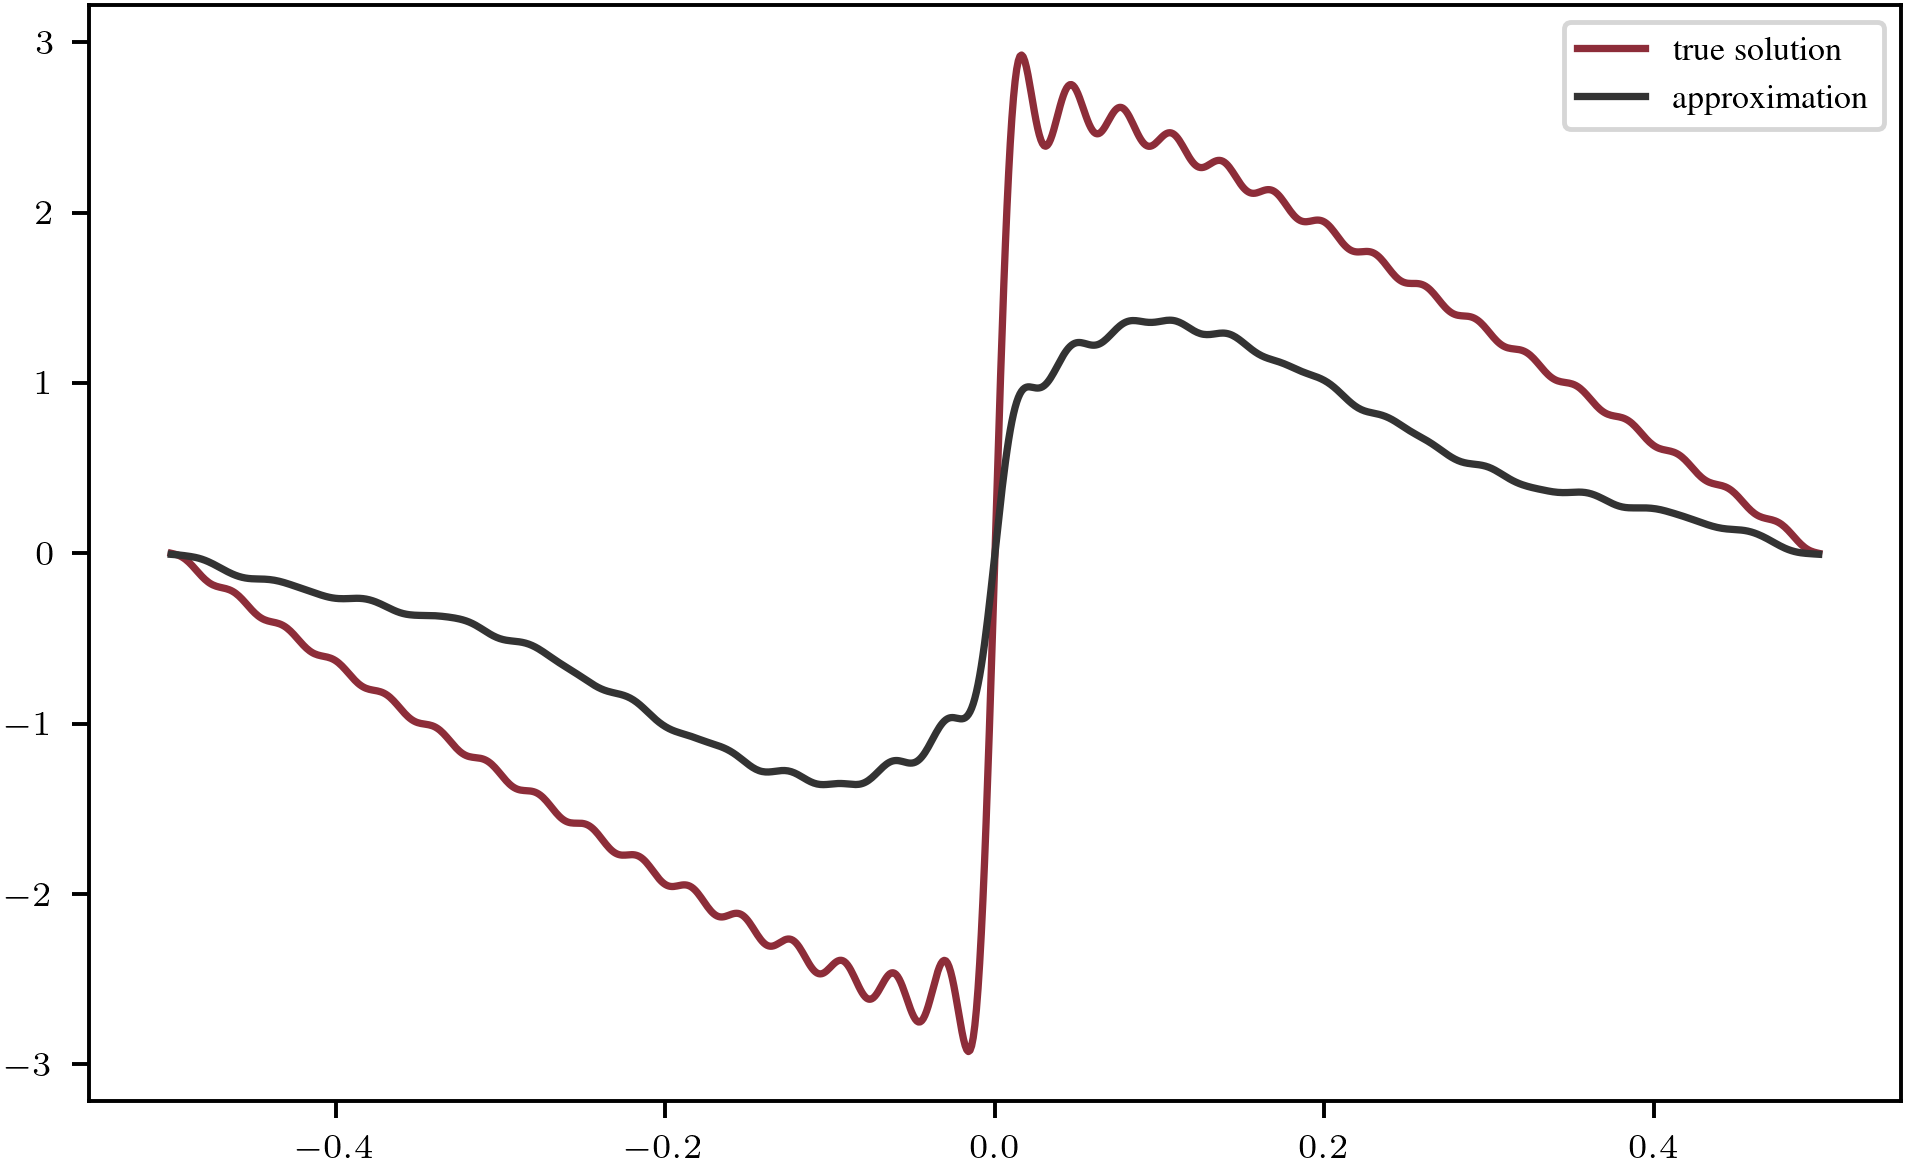

In [ ]:
from tueplots import  bundles
plt.rcParams.update(bundles.neurips2023())
plt.rcParams.update({"figure.dpi": 350})


#define colors
red = np.array([141.0, 45.0, 57.0]) / 255.0
dark = np.array([51.0, 51.0, 51.0]) / 255.0

#plot true solution and w
fig, ax = plt.subplots(1, )
ax.plot(time_array, target, label='true solution', color = red)
ax.plot(time_array, w , label='approximation', color = dark)
ax.legend()


In [ ]:
w_diff_coeff = w_fourier - true_w_coeff
# w_diff_coeff = np.fft.fft(w)/d + np.fft.fft(true_w)/d
error_h_squared = (np.abs(w_diff_coeff[:M])**2 / kernel_coeff[:M]).sum()

In [ ]:
# plt.plot(w_diff_coeff[:100], 'o')

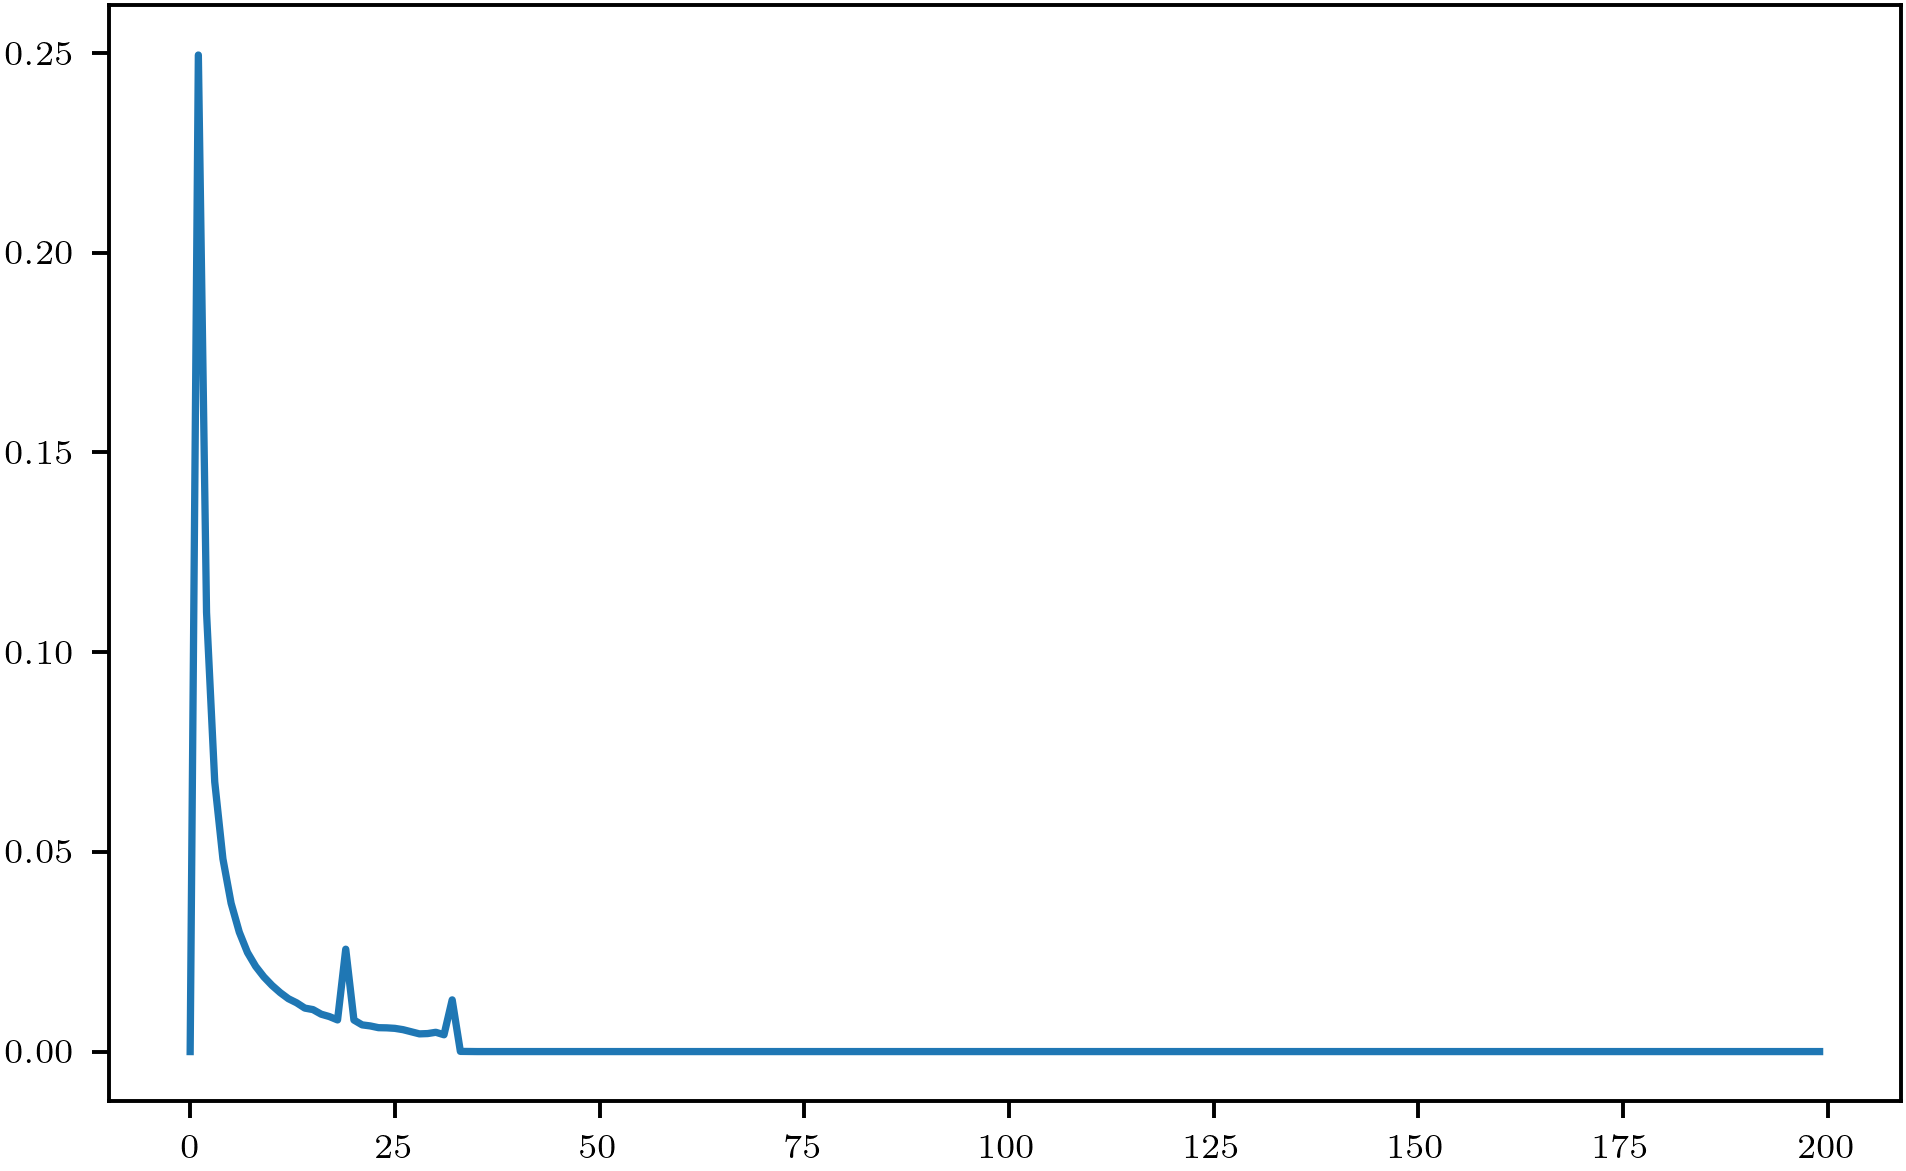

In [ ]:
until = 12000
eps = 1e-10

vec = np.abs(w_diff_coeff[:M+100])**2 / (kernel_coeff[:M+100])
plt.plot( vec)


In [ ]:
error_h_squared

0.8171045735384806